# Analysis of Drug Poisoning Mortality in the U.S. (1999 - 2018)

In [21]:
#Python Libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np

In [2]:
drug_mort = pd.read_csv("Drug_Mortality_byState.csv")
drug_mort.head()

,State,Year,Sex,Age Group,Race and Hispanic Origin,Deaths,Population,Crude Death Rate,Standard Error for Crude Rate,Low Confidence Limit for Crude Rate,Upper Confidence Limit for Crude Rate,Age-adjusted Rate,Standard Error Age-adjusted Rate,Lower Confidence Limit for Age-adjusted Rate,Upper Confidence for Age-adjusted Rate,State Crude Rate in Range,US Crude Rate,US Age-adjusted Rate,Unit
0,United States,2003,Both Sexes,"15�""24",Hispanic,226,"7,255,772",3.1148,0.20719,2.7087,3.5209,NaN,NaN,NaN,NaN,NaN,8.8881,8.8765,"per 100,000 population"
1,Alabama,1999,Both Sexes,All Ages,All Races-All Origins,169,"4,430,143",3.8148,0.29344,3.2396,4.3899,3.8521,0.29657,3.2708,4.4334,"1.8�""7.5",6.0382,6.0570,"per 100,000 population"
2,Alabama,2000,Both Sexes,All Ages,All Races-All Origins,197,"4,447,100",4.4299,0.31561,3.8112,5.0485,4.4857,0.31985,3.8588,5.1126,"1.8�""7.5",6.1882,6.1749,"per 100,000 population"
3,Alabama,2001,Both Sexes,All Ages,All Races-All Origins,216,"4,467,634",4.8348,0.32896,4.1900,5.4795,4.8915,0.33329,4.2382,5.5447,"1.8�""7.5",6.8057,6.7922,"per 100,000 population"
4,Alabama,2002,Both Sexes,All Ages,All Races-All Origins,211,"4,480,089",4.7097,0.32423,4.0742,5.3452,4.7619,0.32868,4.1177,5.4062,"1.8�""7.5",8.1766,8.1957,"per 100,000 population"


# Data Cleaning:

### Checking data types

In [3]:
drug_mort.dtypes

State                                            object
Year                                              int64
Sex                                              object
Age Group                                        object
Race and Hispanic Origin                         object
Deaths                                            int64
Population                                       object
Crude Death Rate                                float64
Standard Error for Crude Rate                   float64
Low Confidence Limit for Crude Rate             float64
Upper Confidence Limit for Crude Rate           float64
Age-adjusted Rate                               float64
Standard Error Age-adjusted Rate                float64
Lower Confidence Limit for Age-adjusted Rate    float64
Upper Confidence for Age-adjusted Rate          float64
State Crude Rate in Range                        object
US Crude Rate                                   float64
US Age-adjusted Rate                            

The population data section was read in as a object so we will need to convert to int

In [4]:
drug_mort['Population'] = drug_mort['Population'].str.replace(',', '') #need to remove commas from population
drug_mort["Population"] = pd.to_numeric(drug_mort["Population"]) #change to int
drug_mort["Population"].head()

0    7255772
1    4430143
2    4447100
3    4467634
4    4480089
Name: Population, dtype: int64

### Checking for Null values

In [5]:
drug_mort.isnull().sum()

State                                              0
Year                                               0
Sex                                                0
Age Group                                          0
Race and Hispanic Origin                           0
Deaths                                             0
Population                                         0
Crude Death Rate                                   0
Standard Error for Crude Rate                      0
Low Confidence Limit for Crude Rate                0
Upper Confidence Limit for Crude Rate              0
Age-adjusted Rate                               1920
Standard Error Age-adjusted Rate                1920
Lower Confidence Limit for Age-adjusted Rate    1920
Upper Confidence for Age-adjusted Rate          1920
State Crude Rate in Range                       1920
US Crude Rate                                      0
US Age-adjusted Rate                               0
Unit                                          

These Nan values are under the same 1920 rows which are all listed under rows with Age Group categories (0-14, 15-24, 25-34, etc.) so there is no Age-adjusted rate being calculated for those rows. In this case Nan may imply that those values are missing so we will fill them with the same values for Crude Death Rate indicating no age adjustment.

In [6]:
drug_mort['Age-adjusted Rate'] = drug_mort['Age-adjusted Rate'].fillna(drug_mort['Crude Death Rate'])
drug_mort['Standard Error Age-adjusted Rate'] = drug_mort['Standard Error Age-adjusted Rate'].fillna(drug_mort['Standard Error for Crude Rate'])
drug_mort['Lower Confidence Limit for Age-adjusted Rate'] = drug_mort['Lower Confidence Limit for Age-adjusted Rate'].fillna(drug_mort['Low Confidence Limit for Crude Rate'])
drug_mort['Upper Confidence for Age-adjusted Rate'] = drug_mort['Upper Confidence for Age-adjusted Rate'].fillna(drug_mort['Upper Confidence Limit for Crude Rate'])

#fill in with US Crude Rate since Nan values are under rows with "United States" as State
drug_mort['State Crude Rate in Range'] = drug_mort['State Crude Rate in Range'].fillna(drug_mort['US Crude Rate'])

drug_mort.isnull().sum()

State                                           0
Year                                            0
Sex                                             0
Age Group                                       0
Race and Hispanic Origin                        0
Deaths                                          0
Population                                      0
Crude Death Rate                                0
Standard Error for Crude Rate                   0
Low Confidence Limit for Crude Rate             0
Upper Confidence Limit for Crude Rate           0
Age-adjusted Rate                               0
Standard Error Age-adjusted Rate                0
Lower Confidence Limit for Age-adjusted Rate    0
Upper Confidence for Age-adjusted Rate          0
State Crude Rate in Range                       0
US Crude Rate                                   0
US Age-adjusted Rate                            0
Unit                                            0
dtype: int64

### Cleaning Age Group and State Crude Rate in Range columns that incorrectly read in missing the dash symbol

In [8]:
#Using String Regex to replace missing symbols with dash symbol (-)
drug_mort['Age Group'] = drug_mort['Age Group'].str.replace(r'�"', '-')
drug_mort['State Crude Rate in Range'] = drug_mort['State Crude Rate in Range'].str.replace(r'�"', '-')
drug_mort.head()

,State,Year,Sex,Age Group,Race and Hispanic Origin,Deaths,Population,Crude Death Rate,Standard Error for Crude Rate,Low Confidence Limit for Crude Rate,Upper Confidence Limit for Crude Rate,Age-adjusted Rate,Standard Error Age-adjusted Rate,Lower Confidence Limit for Age-adjusted Rate,Upper Confidence for Age-adjusted Rate,State Crude Rate in Range,US Crude Rate,US Age-adjusted Rate,Unit
0,United States,2003,Both Sexes,15-24,Hispanic,226,7255772,3.1148,0.20719,2.7087,3.5209,3.1148,0.20719,2.7087,3.5209,NaN,8.8881,8.8765,"per 100,000 population"
1,Alabama,1999,Both Sexes,All Ages,All Races-All Origins,169,4430143,3.8148,0.29344,3.2396,4.3899,3.8521,0.29657,3.2708,4.4334,1.8-7.5,6.0382,6.0570,"per 100,000 population"
2,Alabama,2000,Both Sexes,All Ages,All Races-All Origins,197,4447100,4.4299,0.31561,3.8112,5.0485,4.4857,0.31985,3.8588,5.1126,1.8-7.5,6.1882,6.1749,"per 100,000 population"
3,Alabama,2001,Both Sexes,All Ages,All Races-All Origins,216,4467634,4.8348,0.32896,4.1900,5.4795,4.8915,0.33329,4.2382,5.5447,1.8-7.5,6.8057,6.7922,"per 100,000 population"
4,Alabama,2002,Both Sexes,All Ages,All Races-All Origins,211,4480089,4.7097,0.32423,4.0742,5.3452,4.7619,0.32868,4.1177,5.4062,1.8-7.5,8.1766,8.1957,"per 100,000 population"


### The column title "Race and Hispanic Origin" and its values are slightly confusing so renamed to simplify messiness

In [9]:
drug_mort.rename(columns = {'Race and Hispanic Origin':'Race Origin'}, inplace = True)
#removing messy strings from matching rows
drug_mort['Race Origin'] = drug_mort['Race Origin'].str.replace('-All Origins', '') 
drug_mort['Race Origin'] = drug_mort['Race Origin'].str.replace('Non-Hispanic', '') 
#drug_mort.sample(15)

## Creating dataframe grouped by the different age groups (0-14, 15-24, 25-34, 35-45, 45-64, 65-74, & 75+) and another dataframe for "All Ages" for each state and entire U.S.

In [7]:
#use to see the different age groups in column
#drug_mort['Age Group'].sample(50)

#### Age grouped for entire U.S. 

Rows with specific age groups are only for the "United States" not individual states so no additional subsetting is needed

In [79]:
#Age Grouped for United States
age_grouped_us = drug_mort[drug_mort["Age Group"]!="All Ages"] 
age_grouped_us.head()

,State,Year,Sex,Age Group,Race Origin,Deaths,Population,Crude Death Rate,Standard Error for Crude Rate,Low Confidence Limit for Crude Rate,Upper Confidence Limit for Crude Rate,Age-adjusted Rate,Standard Error Age-adjusted Rate,Lower Confidence Limit for Age-adjusted Rate,Upper Confidence for Age-adjusted Rate,State Crude Rate in Range,US Crude Rate,US Age-adjusted Rate,Unit
0,United States,2003,Both Sexes,15-24,Hispanic,226,7255772,3.1148,0.20719,2.7087,3.5209,3.1148,0.20719,2.7087,3.5209,NaN,8.8881,8.8765,"per 100,000 population"
276,United States,1999,Both Sexes,15-24,Hispanic,148,6316798,2.3430,0.19259,1.9655,2.7204,2.3430,0.19259,1.9655,2.7204,NaN,6.0382,6.0570,"per 100,000 population"
311,United States,2000,Both Sexes,15-24,Hispanic,127,6581073,1.9298,0.17124,1.5941,2.2654,1.9298,0.17124,1.5941,2.2654,NaN,6.1882,6.1749,"per 100,000 population"
883,United States,1999,Both Sexes,0-14,All Races,74,59955378,0.1234,0.01435,0.0969,0.1549,0.1234,0.01435,0.0969,0.1549,NaN,6.0382,6.0570,"per 100,000 population"
884,United States,2000,Both Sexes,0-14,All Races,74,60253375,0.1228,0.01428,0.0964,0.1542,0.1228,0.01428,0.0964,0.1542,NaN,6.1882,6.1749,"per 100,000 population"


#### All Ages for each state. 
Rows with "All Ages" are separated by each state and also for the United States so subset dataframe needed

In [11]:
#Ages by State
all_ages_state = drug_mort[drug_mort["Age Group"]=="All Ages"]
all_ages_state = all_ages_state[all_ages_state["State"]!="United States"]
#all_ages_state.head()

## Creating dataframe grouped by different Race Origins for the entire U.S.
State level data does not have individual race origins

In [12]:
#use to see the different Race Origins in column
drug_mort['Race Origin'].sample(10)

1554        White
2060        Black
2518     Hispanic
1684    All Races
388     All Races
1547        White
42      All Races
3       All Races
2678     Hispanic
2186        White
Name: Race Origin, dtype: object

####  Race Origins (Hispanic, Non-Hispanic Black, and Non-Hispanic White) for Entire U.S.

In [14]:
#Other Race Origins for entire U.S.
other_races_US = drug_mort[drug_mort['Race Origin']!="All Races"]
other_races_US.head()

,State,Year,Sex,Age Group,Race Origin,Deaths,Population,Crude Death Rate,Standard Error for Crude Rate,Low Confidence Limit for Crude Rate,Upper Confidence Limit for Crude Rate,Age-adjusted Rate,Standard Error Age-adjusted Rate,Lower Confidence Limit for Age-adjusted Rate,Upper Confidence for Age-adjusted Rate,State Crude Rate in Range,US Crude Rate,US Age-adjusted Rate,Unit
0,United States,2003,Both Sexes,15-24,Hispanic,226,7255772,3.1148,0.20719,2.7087,3.5209,3.1148,0.20719,2.7087,3.5209,NaN,8.8881,8.8765,"per 100,000 population"
276,United States,1999,Both Sexes,15-24,Hispanic,148,6316798,2.3430,0.19259,1.9655,2.7204,2.3430,0.19259,1.9655,2.7204,NaN,6.0382,6.0570,"per 100,000 population"
311,United States,2000,Both Sexes,15-24,Hispanic,127,6581073,1.9298,0.17124,1.5941,2.2654,1.9298,0.17124,1.5941,2.2654,NaN,6.1882,6.1749,"per 100,000 population"
931,United States,2001,Both Sexes,15-24,Hispanic,146,6855013,2.1298,0.17627,1.7843,2.4753,2.1298,0.17627,1.7843,2.4753,NaN,6.8057,6.7922,"per 100,000 population"
1046,United States,2002,Both Sexes,15-24,Hispanic,199,7061858,2.8180,0.19976,2.4264,3.2095,2.8180,0.19976,2.4264,3.2095,NaN,8.1766,8.1957,"per 100,000 population"


# Analysis:

### Total Deaths from 1999-2018

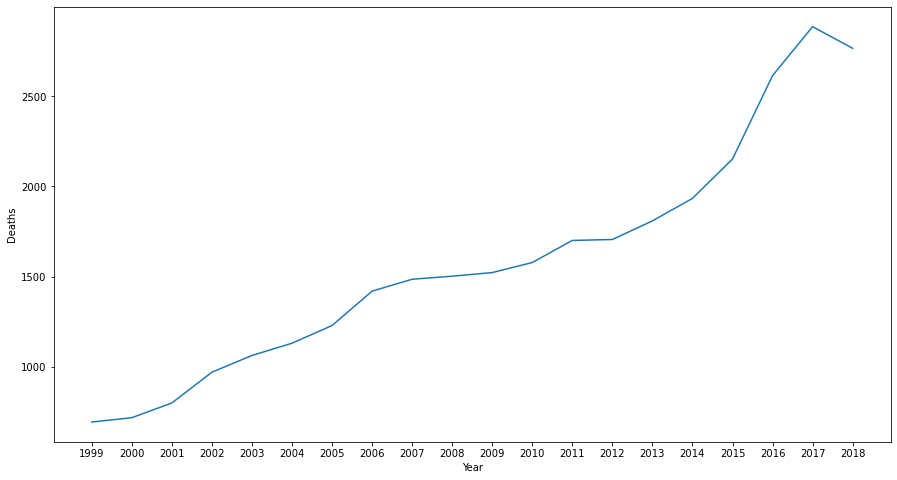

In [89]:
%matplotlib inline
plt.figure(figsize=(15,8))
sb.lineplot(x = "Year", y = "Deaths", ci=None, data=age_grouped_us)
x_ticks = np.arange(1999, 2019, 1)
plt.xticks(x_ticks)
plt.show()

This line plot shows the total amount of drug mortalities in the U.S. from 1999-2018. Each year the number of deaths increase by a few hundred and by 2014 there is a sharp increase that reaches its peak in 2017. This is strong evidence that drug mortalities have become more frequent each year. 

### State deaths by year

<IPython.core.display.Javascript object>


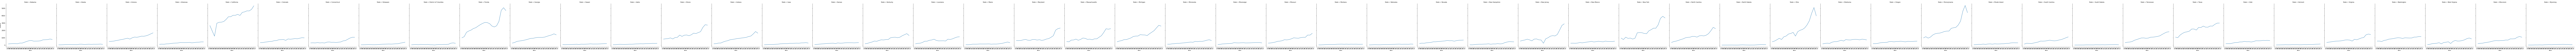

In [102]:
%matplotlib notebook
sb.relplot(x = "Year", y = "Deaths", col = "State", kind='line',ci=None, data=all_ages_state)
x_ticks = np.arange(1999, 2019, 1)
plt.xticks(x_ticks)
plt.show()

The frequency of deaths varies greatly between each state. The majority of states have a flat or slightly increasing trend. The states with the highest frequencies and greatest increase in deaths are: California, Florida, New York, Ohio, and Pennsylvania. All of these states are among the top ten most populated states in the U.S. which likely contributes to this trend. We can clearly tell that drug mortatilites in these 4 states are at an alarming rate when compared to other states and should be targeted by health organizations.

### Deaths by age group:

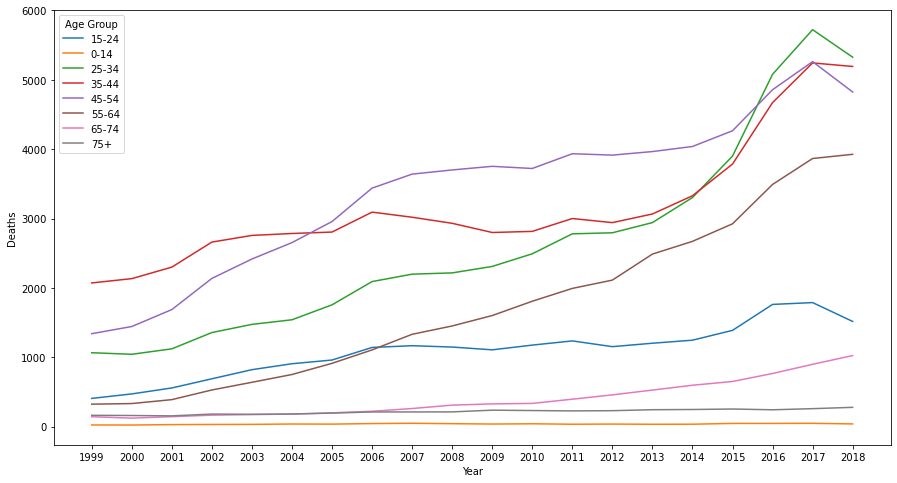

In [97]:
%matplotlib inline
plt.figure(figsize=(15,8))
sb.lineplot(x = "Year", y = "Deaths", hue = "Age Group", ci=None, data=age_grouped_us)
x_ticks = np.arange(1999, 2019, 1)
plt.xticks(x_ticks)
plt.show()

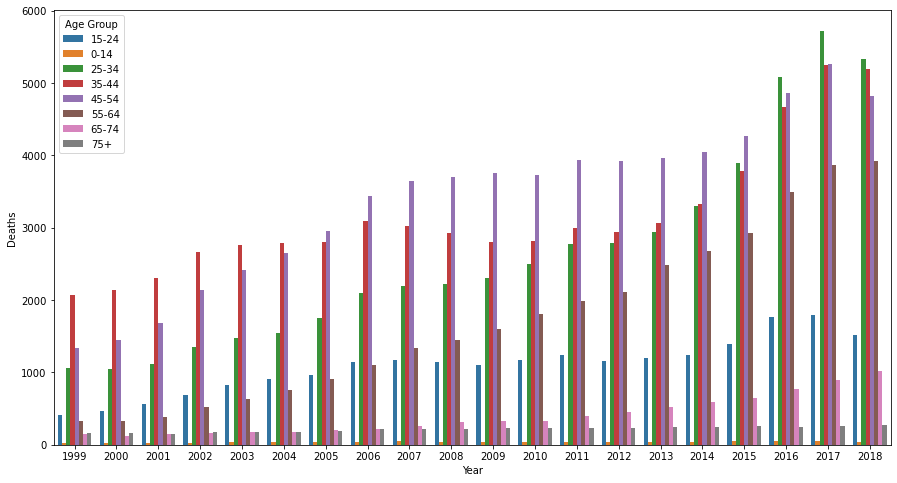

In [99]:
%matplotlib inline
plt.figure(figsize=(15,8))
sb.barplot(data=age_grouped_us,  x="Year",  y="Deaths", hue="Age Group", ci=None)
plt.show()

The youngest and oldest age groups (0-14, 15-24, 65-74, and 75+) have the lowest rates of drug mortalities whereas the middle age groups (25-34, 35-44, 45-54, and 55-64) have the highest rates of drug mortalities, all hitting their peaks in 2017. In the barplot we can see that the 35-44 and 45-54 age groups, historically had the highest drug mortalities but in just a few years (2015-2018) the 25-34 age group out grows the others and has the highest all time drug mortalities of any age group in 2017. 

These trends are not surprising as age groups in the middle make up the larger majority of the population and are much more likely to be users of drugs that can be more lethal. What is surprising is the sharp increase in drug mortalities in the 25-34 age group. I expected this younger age group to always have been the leading age group in drug mortalities. 

### Deaths by Race

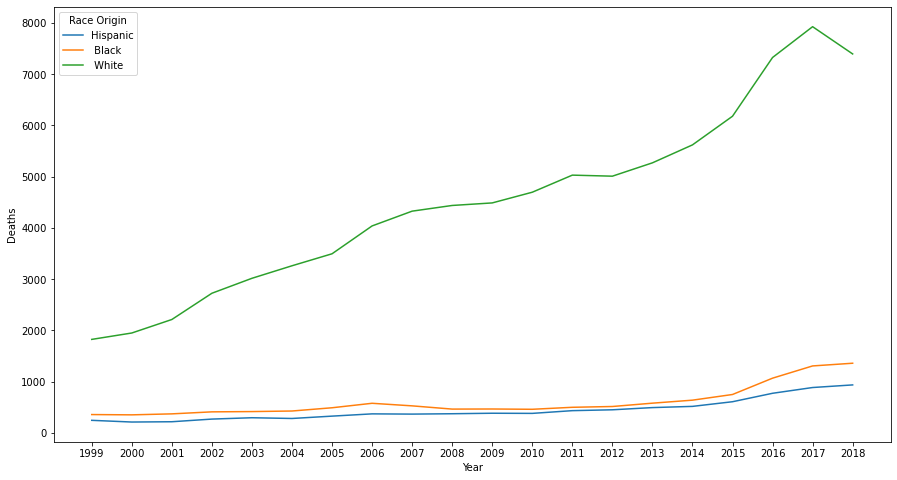

In [100]:
%matplotlib inline
plt.figure(figsize=(15,8))
sb.lineplot(x = "Year", y = "Deaths", hue = "Race Origin", ci=None, data=other_races_US)
x_ticks = np.arange(1999, 2019, 1)
plt.xticks(x_ticks)
plt.show()

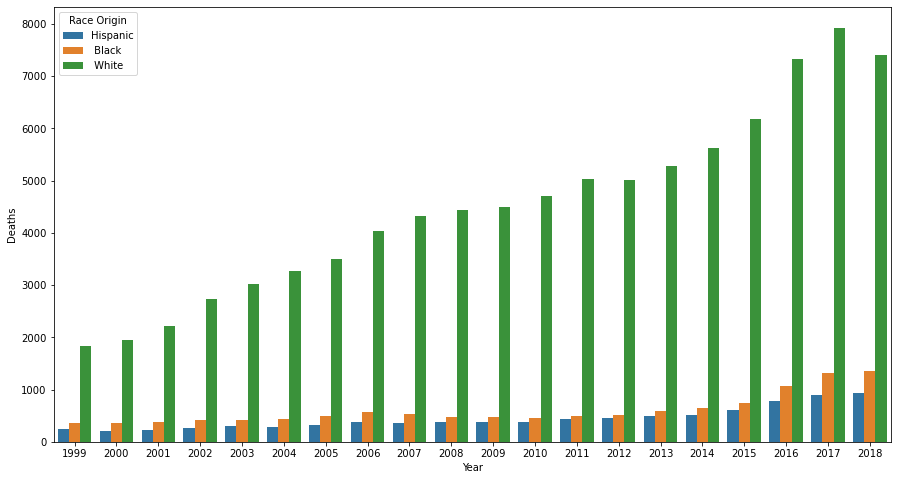

In [101]:
%matplotlib inline
plt.figure(figsize=(15,8))
sb.barplot(data=other_races_US,  x="Year",  y="Deaths", hue="Race Origin", ci=None)
plt.show()

This clearly shows that people of white origin make up for almost all of the drug mortalities from 1999-2018 in the United States. Drug mortalities for black and hispanic origins remain very low and have flat trends with slight increases in 2016-2018 which is consistent with our other findings when looking at drug mortalities for the entire U.S. This huge disparity may seem surprising but when looking at opiod related deaths in the U.S. by race this trend is also echoed in those statistics because opiod use in white communities are statistically much higher than in other race communities. This trend strongly supports the public health warnings on the opiod crisis. 

## Correlations:

To measure if the differences between group means are statistically significant a One-Way ANOVA test was utilized. Age group and race origins are our categorical variables of interest and we are looking at the differences in mean deaths between each group.

### Deaths by age group:

In [81]:
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
 
# Finds out the Prices data for each FuelType as a lis
CategoryGroupLists1=age_grouped_us.groupby('Age Group')['Deaths'].apply(list)
print(CategoryGroupLists1)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults1 = f_oneway(*CategoryGroupLists1)
print('P-Value for Anova is: ', AnovaResults1[1])

Age Group
0-14     [74, 74, 91, 97, 100, 117, 112, 137, 151, 131,...
15-24    [226, 148, 127, 1240, 1435, 1700, 2095, 2491, ...
25-34    [3236, 3169, 3410, 4125, 4488, 4680, 5340, 634...
35-44    [6295, 6469, 6968, 8064, 8358, 8439, 8506, 937...
45-54    [4067, 4389, 5115, 6466, 7325, 8040, 8968, 104...
55-64    [991, 1013, 1185, 1601, 1943, 2283, 2761, 3355...
65-74    [434, 371, 440, 508, 534, 549, 607, 677, 791, ...
75+      [496, 483, 470, 552, 536, 555, 596, 644, 644, ...
Name: Deaths, dtype: object
P-Value for Anova is:  6.239572982291277e-107


The ANOVA for deaths by age group returned a very small p-value <.05 so there is very strong evidence that the differences between group means are statistically significant. This supports what we saw in the line and barplot as certain age groups had extremely high rates of deaths compared to others.

### Deaths by race origin:

In [82]:
# Running the one-way anova test between CarPrice and FuelTypes
 
# Finds out the Prices data for each FuelType as a lis
CategoryGroupLists2=other_races_US.groupby('Race Origin')['Deaths'].apply(list)
print(CategoryGroupLists2)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults2 = f_oneway(*CategoryGroupLists2)
print('P-Value for Anova is: ', AnovaResults2[1])

Race Origin
 Black      [22, 14, 24, 28, 30, 32, 31, 37, 40, 35, 24, 2...
 White      [37, 46, 55, 53, 54, 72, 63, 75, 80, 79, 71, 8...
Hispanic    [226, 148, 127, 146, 199, 14, 7, 9, 11, 15, 8,...
Name: Deaths, dtype: object
P-Value for Anova is:  1.3458071332241042e-63


The ANOVA for deaths by race origin returned a very small p-value <.05 so there is very strong evidence that the differences between group means are statistically significant. This supports what we saw in the line and barplot as the white race origin had extremely high rates of deaths compared to Black and Hispanic race origins. 